<a href="https://colab.research.google.com/github/saipranathi25/spam-mail-detection/blob/main/Spam_Mail_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="width: 80%; text-align: center; margin: auto; padding: 20px; background-color: #3498db; color: #ffffff; border-radius: 12px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3);" markdown="1">
    <span style="font-size: 40px; font-weight: bold;">📩 SPAM OR HAM 📮</span>
    <p style="font-size: 18px; margin-top: 10px;">Classifying SMS Messages with Style!</p>
</div>


In [1]:
#Importing all the libraries to be used
# For df
import numpy as np
import pandas as pd


In [2]:

# Disable all warnings
import warnings
warnings.filterwarnings ('ignore')


In [3]:

# for visualization
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from wordcloud import WordCloud


In [4]:

# nltk used for NLP | re used for searching the patterns
import re
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [5]:
# Preprocessing (sklearn)
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [8]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.4 MB/s eta 0:00:00


In [9]:

# Modeling
from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold


In [10]:
# scoring
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, RocCurveDisplay


In [11]:
# Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalMaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [13]:
df=pd.read_csv('mail_data.csv')

In [14]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Text(0.5, 1.0, 'Distribution of missing values')

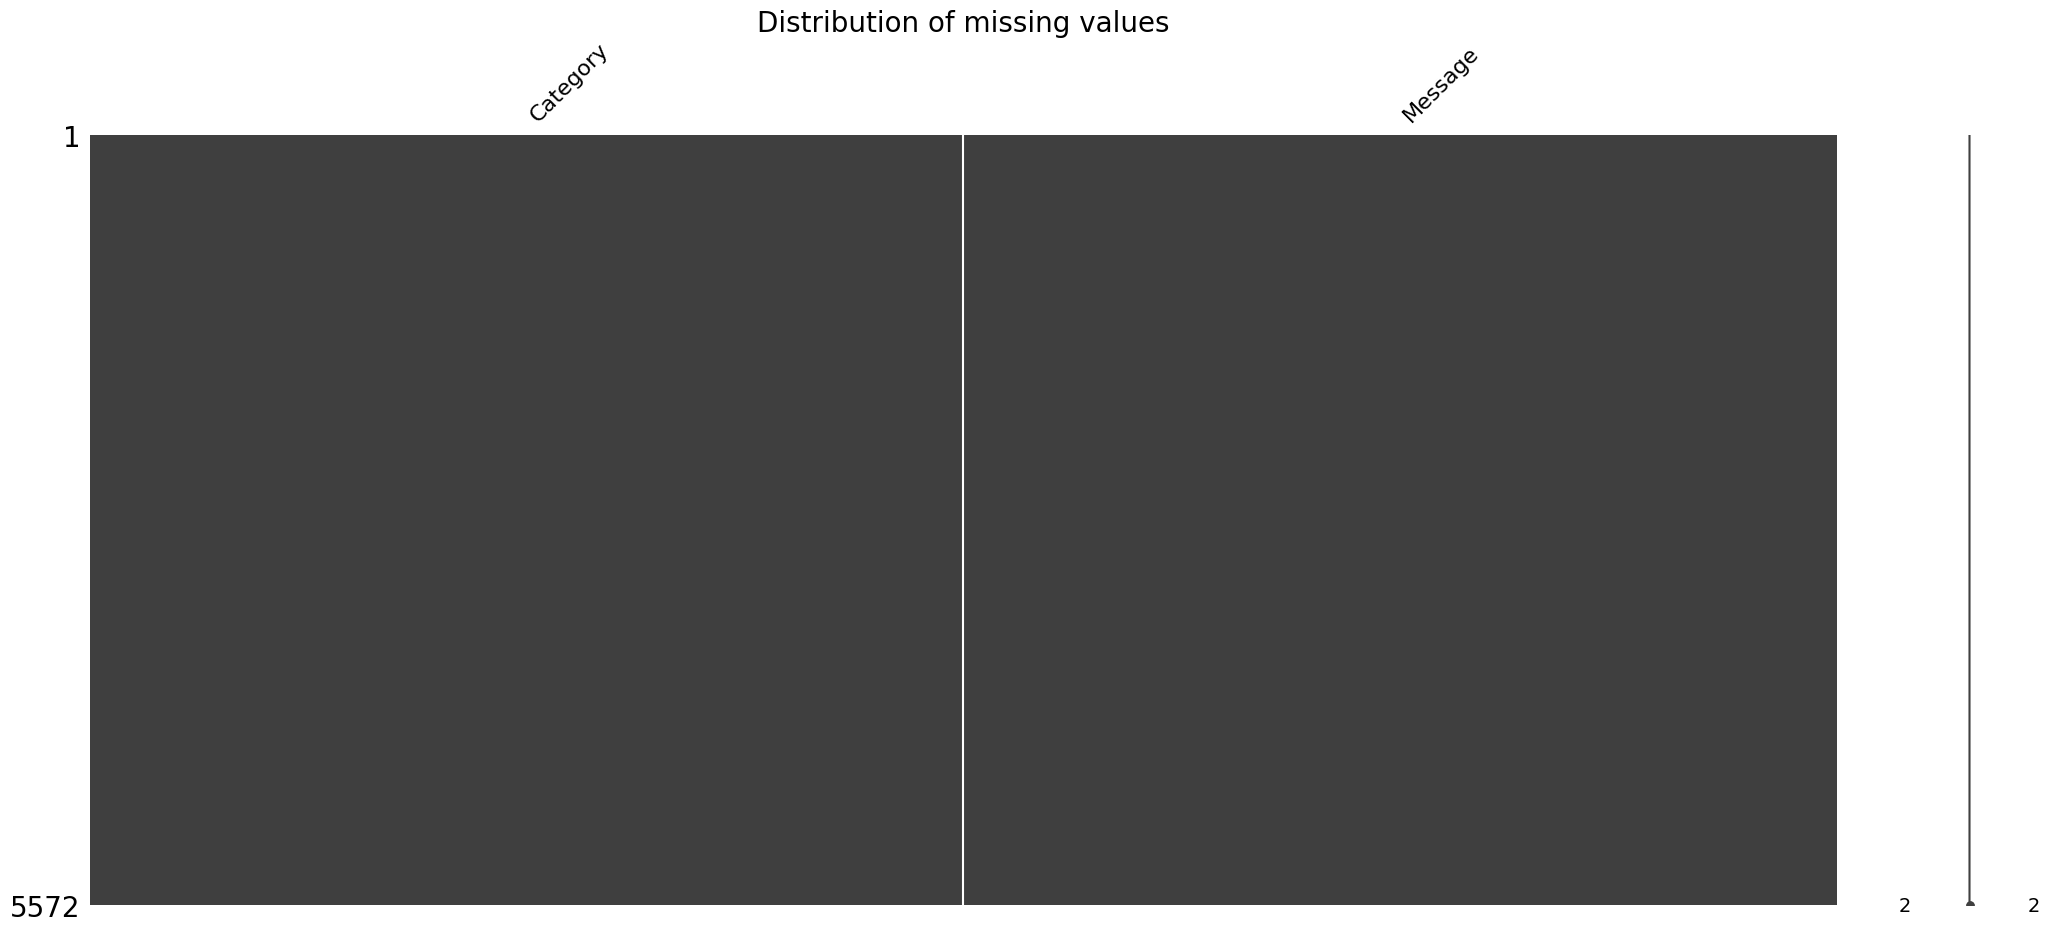

In [15]:
msno.matrix(df).set_title('Distribution of missing values',fontsize=20)

In [16]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [17]:
print(df.shape)

(5572, 2)


In [18]:
df.duplicated().sum()

415

In [19]:
df = df.drop_duplicates(keep='first')

In [20]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [21]:
print(df.shape)

(5157, 2)


In [22]:
#renaming the column names to a better and meaningful column name
df.rename(columns = {'Message':'Text'}, inplace=True)

#displaying the edited dataframe
df

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [23]:
df.Category.value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

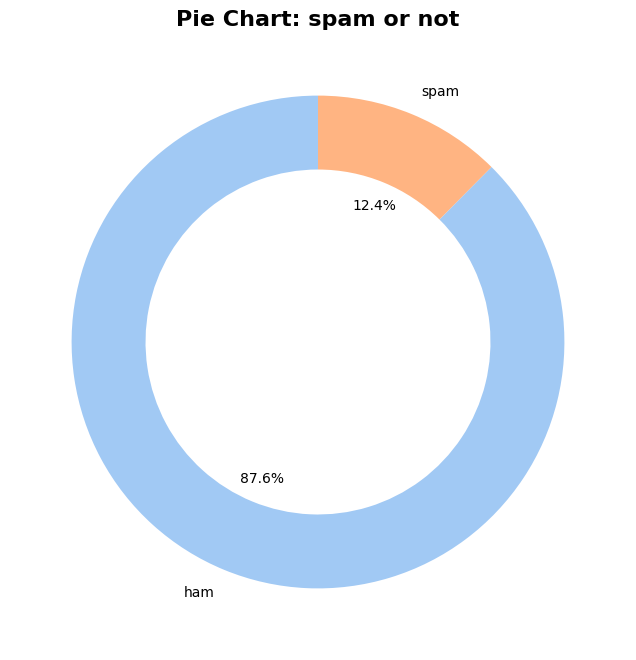

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

category_ct = df['Category'].value_counts()

# Set the color palette for the pie chart
colors = sns.color_palette('pastel')

# Create a pie chart using Matplotlib and Seaborn
plt.figure(figsize=(8, 8))
plt.pie(category_ct, labels=category_ct.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops=dict(width=0.3))
plt.title('Pie Chart: spam or not', fontsize=16, fontweight='bold')
plt.show()


In [25]:
categories = pd.get_dummies(df["Category"])
spam_or_not = pd.concat([df, categories], axis=1)
spam_or_not.drop('Category', axis=1, inplace=True)

df["length"] = df["Text"].apply(len)

# Filter rows based on the 'ham' category
ham = df.loc[spam_or_not['ham'] == 1].reset_index(drop=True)
spam = df.loc[spam_or_not['ham'] == 0].reset_index(drop=True)



In [26]:
df

,Category,Text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


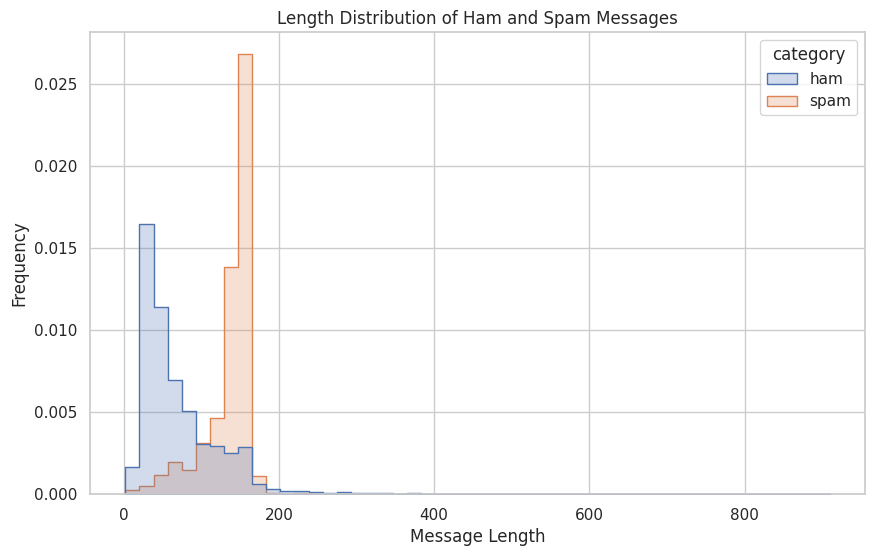

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Concatenate ham and spam DataFrames
combined_df = pd.concat([ham.assign(category='ham'), spam.assign(category='spam')])

# Set the style for Seaborn
sns.set(style="whitegrid")

# Use Seaborn's displot for better flexibility
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='length', hue='category', bins=50, stat='density', common_norm=False, element='step', kde=False)
plt.title('Length Distribution of Ham and Spam Messages')
plt.xlabel('Message Length')
plt.ylabel('Frequency')

# Move the legend outside the plot
# plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize layout using Matplotlib
plt.grid(True)

# Show the plot
plt.show()


In [28]:
import plotly.express as px
import pandas as pd

# Assuming ham and spam DataFrames are already defined

# Concatenate ham and spam DataFrames
combined_df = pd.concat([ham.assign(category='ham'), spam.assign(category='spam')])

# Create an interactive histogram using Plotly Express
fig = px.histogram(combined_df, x='length', color='category', nbins=30,
                   labels={'length': 'Message Length'},
                   title='Length Distribution of Ham and Spam Messages',
                   template='plotly_white',  # Set background to white
                   opacity=0.6,  # Adjust opacity for better visibility
                   color_discrete_map={'ham': 'black', 'spam': 'red'})

# Customize layout
fig.update_layout(
    xaxis_title='Message Length',
    yaxis_title='Frequency',
    legend_title='Category',
    bargap=0.2,  # Set gap between bars
)

# Show the interactive plot
fig.show()


In [29]:
import plotly.express as px
import pandas as pd

# Assuming ham and spam DataFrames are already defined

# Concatenate ham and spam DataFrames
combined_df = pd.concat([ham.assign(category='ham'), spam.assign(category='spam')])

# Create an interactive histogram using Plotly Express
fig = px.histogram(combined_df, x='length', color='category', nbins=50,
                   marginal='rug', # Display rug plot along the x-axis
                   labels={'length': 'Message Length'},
                   title='Length Distribution of Ham and Spam Messages',
                   template='plotly_white',  # Set background to white
                   opacity=0.7, # Set opacity for better visibility
                   color_discrete_map={'ham': 'black', 'spam': 'red'})

# Customize layout
fig.update_layout(
    xaxis_title='Message Length',
    yaxis_title='Frequency',
    legend_title='Category',
    bargap=0.2, # Set gap between bars
)

# Show the interactive plot
fig.show()


In [30]:
# function to get all of strings from dataframe column, and used lower function here.
def get_all_str(df):
    sentence = ''
    for i in range(len(df)):
        sentence += df['Text'][i]
    sentence = sentence.lower()
    return sentence


In [31]:

def get_str(lst):
    sentence = ''
    for char in lst:
        sentence += char+' '
    sentence = sentence.lower()
    return sentence


In [32]:

# function to get words from text(string). used RegexpTokenizer
def get_word(text):
    result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
#     result = result.lower()
#     result = nltk.word_tokenize(text)
    return result


In [33]:

# function to add stopwords to nltp stopword list.
def stopword_list(stop):
    lst = stopwords.words('english')
    for stopword in stop:
        lst.append(stopword)
    return lst


In [34]:

# function to remove stopwords from list.
def remove_stopword(stopwords, lst):
    stoplist = stopword_list(stopwords)
    txt = ''
    for idx in range(len(lst)):
        txt += lst[idx]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stoplist]
    return cleanwordlist


In [35]:

# function to get dataframe from cleanwordlist.
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq


In [36]:

# function to lemmatize words
def lemmatization(words):
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word) for word in words]
    return tokens

In [37]:
# function to plot word cloud of words
def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=800,
               height=400,
               max_words=100,
               colormap= colormap,
               max_font_size=140,
               min_font_size = 2,
               random_state=8888,
               background_color=color_background).generate_from_frequencies(data)

    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

In [38]:
ham.tail(3)

,Category,Text,length
4513,ham,"Pity, * was in mood for that. So...any other s...",57
4514,ham,The guy did some bitching but I acted like i'd...,125
4515,ham,Rofl. Its true to its name,26


In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
string = get_all_str(ham)
words = get_word(string)
removed = remove_stopword('1',words)
# show 10 words for example
print(removed[:10])

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la']


In [42]:
freq_df = Freq_df(removed)
top_10 = freq_df[:10]

# Create an interactive bar plot with Plotly Express
fig = px.bar(
    top_10,
    x='Term',
    y='Frequency',
    text='Frequency',
    color='Term',
    color_discrete_sequence=px.colors.sequential.PuBuGn,
    title='Top 10 Ham Terms',
    labels={'Frequency': 'Term Frequency'},
    template='plotly_dark',  # Use a dark template for a sleek look
    height=500,  # Set the height of the plot
)

# Customize the appearance of the bars
for idx in range(len(top_10)):
    fig.data[idx].marker.line.width = 2
    fig.data[idx].marker.line.color = "black"

# Adjust the position and size of the text labels
fig.update_traces(textposition='inside', textfont_size=12)

# Add gridlines for better readability
fig.update_layout(xaxis_showgrid=True, yaxis_showgrid=True)

# Customize axes titles and ticks
fig.update_layout(xaxis_title='Terms', yaxis_title='Term Frequency')
fig.update_xaxes(tickangle=45)  # Rotate x-axis labels for better readability

# Show the plot
fig.show()


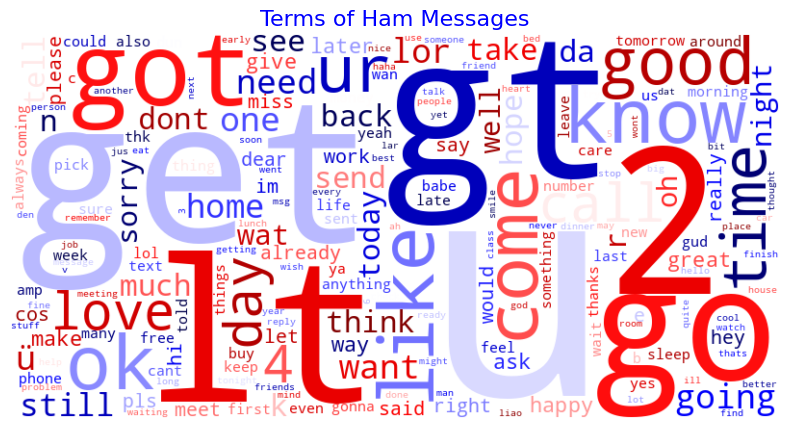

In [43]:
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='seismic',
                      max_words=200, contour_width=3, contour_color='steelblue',
                      relative_scaling=0.5)

# Generate word cloud
wordcloud.generate_from_frequencies(data)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Terms of Ham Messages', fontsize=16, color='blue')

# Show the plot
plt.show()


In [44]:
string = get_all_str(spam)
words = get_word(string)
removed = remove_stopword('1',words)

In [45]:
freq_df = Freq_df(removed)
top_10 = freq_df[:10]

fig = px.bar(top_10, x='Term', y='Frequency', text='Frequency',
             color='Frequency',
             color_continuous_scale='Viridis',  # You can choose other color scales
             title='Rank of Spam Terms',
             labels={'Frequency': 'Frequency Count'},
             template='plotly_dark')

fig.update_traces(textposition='outside', textfont_size=12)

fig.update_layout(
    xaxis=dict(title='Terms', showgrid=False),
    yaxis=dict(title='Frequency Count', showgrid=False),
    coloraxis_colorbar=dict(title='Frequency'),
)

fig.show()


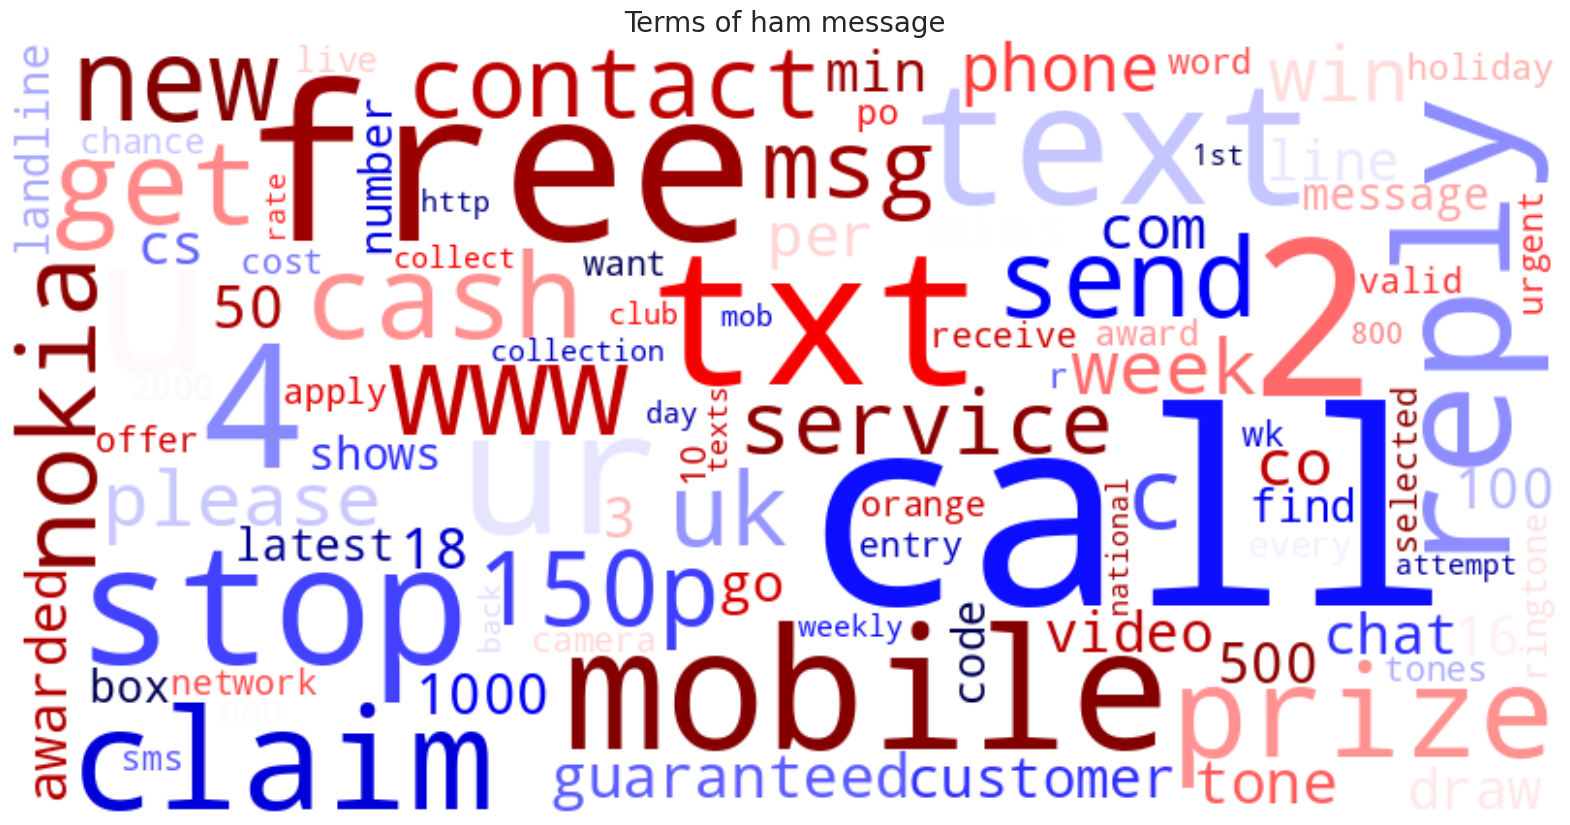

In [46]:
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

spam_wordcloud = Word_Cloud(data, 'white','seismic', 'Terms of ham message')


In [47]:
def preprocess(sentence):
    words = get_word(sentence)
    words_ltz = lemmatization(words)
    removed = remove_stopword('1',words_ltz)
    return removed


In [48]:

df.replace('ham',1,inplace=True)
df.replace('spam',0,inplace=True)
df.head()

,Category,Text,length
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [50]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [51]:

vector = CountVectorizer(analyzer=preprocess)
X = vector.fit(df['Text'])
X_transform = X.transform(df['Text'])


In [52]:
tfidf_transformer = TfidfTransformer().fit(X_transform)
X = tfidf_transformer.transform(X_transform)

In [53]:
# Split dataset into train set and test set, by ratio of 0.3
train_X, test_X, train_y, test_y = train_test_split(X, df['Category'], test_size=0.30, random_state = 8888)

In [54]:
rfc=RandomForestClassifier(random_state=8888)
lgbm = LGBMClassifier(boosting_type='gbdt',objective='binary',random_state=8888)
xgbr = xgb.XGBClassifier(objective='binary:hinge',random_state=8888)
svc = SVC(probability=True,random_state=8888)
catboost = CatBoostClassifier(random_state=8888, logging_level='Silent')


In [55]:
rfc.fit(train_X,train_y)
lgbm.fit(train_X, train_y)
xgbr.fit(train_X, train_y)
svc.fit(train_X, train_y)
catboost.fit(train_X,train_y,verbose=0)


[LightGBM] [Info] Number of positive: 3163, number of negative: 446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5879
[LightGBM] [Info] Number of data points in the train set: 3609, number of used features: 317
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.876420 -> initscore=1.958957
[LightGBM] [Info] Start training from score 1.958957


In [56]:
classifiers = []
classifiers.append(svc)
classifiers.append(rfc)
classifiers.append(xgbr)
classifiers.append(lgbm)
classifiers.append(catboost)


In [57]:

model_names = ['SVC', 'Random Forest', 'XGBClassifier', 'LGBMClassifier', 'CatBoostClassifier']

In [58]:
accuracy_list = []
auc_list = []
recall_list = []
f1_list = []


In [59]:

for classifier in classifiers:
    y_pred_proba = classifier.predict_proba(test_X)[:, 1]
    y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions to avoid any errors

    accuracy_list.append(accuracy_score(test_y, y_pred))
    auc_list.append(roc_auc_score(test_y, y_pred_proba))
    recall_list.append(recall_score(test_y, y_pred))
    f1_list.append(f1_score(test_y, y_pred))

metrics_df = pd.DataFrame({
    'Model': [classifier.__class__.__name__ for classifier in classifiers],
    'Accuracy': accuracy_list,
    'AUC': auc_list,
    'Recall': recall_list,
    'F1': f1_list
})

for model_name, accuracy, auc, recall, f1 in zip([classifier.__class__.__name__ for classifier in classifiers], accuracy_list, auc_list, recall_list, f1_list):
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}, AUC: {auc:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print("=" * 40)


SVC Metrics:
Accuracy: 0.9800, AUC: 0.9901, Recall: 0.9948, F1 Score: 0.9886
RandomForestClassifier Metrics:
Accuracy: 0.9651, AUC: 0.9811, Recall: 0.9993, F1 Score: 0.9804
XGBClassifier Metrics:
Accuracy: 0.9638, AUC: 0.8849, Recall: 0.9904, F1 Score: 0.9795
LGBMClassifier Metrics:
Accuracy: 0.9716, AUC: 0.9823, Recall: 0.9941, F1 Score: 0.9839
CatBoostClassifier Metrics:
Accuracy: 0.9683, AUC: 0.9785, Recall: 0.9985, F1 Score: 0.9822


In [60]:
import plotly.graph_objects as go
def plot_model_score(model_names, metrics_dict, title):
    color_dict = {
        'Accuracy': '#97bad9',
        'AUC': '#bcd6ef',
        'Recall': '#ebcad9',
        'F1': '#d5a6bd'
    }

    fig = go.Figure()

    for metric, color in color_dict.items():
        fig.add_trace(go.Bar(
            name=metric,
            x=model_names,
            y=np.round(metrics_dict[metric], 3),
            text=np.round(metrics_dict[metric], 3),
            marker_color=color
        ))

    fig.update_layout(template='plotly_white', title=title)
    fig.update_layout(xaxis_title="Models", yaxis_title="Score", font=dict(size=17, family='Franklin Gothic'))
    fig.update_layout(yaxis_range=[0.7, 1])

    fig.show()


In [61]:

# Example usage:
model_names = [classifier.__class__.__name__ for classifier in classifiers]


In [62]:

# Assuming metrics_dict is a dictionary containing accuracy, auc, recall, and f1 lists
metrics_dict = {
    'Accuracy': accuracy_list,
    'AUC': auc_list,
    'Recall': recall_list,
    'F1': f1_list
}


In [63]:

plot_model_score(model_names, metrics_dict, 'Model Evaluation Metrics')


In [64]:

# Set random_state
random_state = 8888
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)


In [65]:

# Initialize lists for cross-validation means
cv_accuracy_means = []
cv_auc_means = []
cv_recall_means = []
cv_f1_means = []


In [66]:

# Evaluate each classifier
for classifier in classifiers:
    # Cross-validation results
    cv_accuracy = cross_val_score(classifier, train_X, y=train_y, scoring="accuracy", cv=kfold)
    cv_auc = cross_val_score(classifier, train_X, y=train_y, scoring='roc_auc', cv=kfold)
    cv_recall = cross_val_score(classifier, train_X, y=train_y, scoring='recall', cv=kfold)
    cv_f1 = cross_val_score(classifier, train_X, y=train_y, scoring='f1', cv=kfold)

    # Append mean scores to respective lists
    cv_accuracy_means.append(cv_accuracy.mean())
    cv_auc_means.append(cv_auc.mean())
    cv_recall_means.append(cv_recall.mean())
    cv_f1_means.append(cv_f1.mean())

    # Print or log the results if needed
    print(f"{classifier.__class__.__name__} Cross-Validation Means:")
    print(f"Accuracy: {cv_accuracy.mean():.4f}, AUC: {cv_auc.mean():.4f}, Recall: {cv_recall.mean():.4f}, F1: {cv_f1.mean():.4f}")
    print("=" * 40)


SVC Cross-Validation Means:
Accuracy: 0.9676, AUC: 0.9910, Recall: 1.0000, F1: 0.9818
RandomForestClassifier Cross-Validation Means:
Accuracy: 0.9728, AUC: 0.9906, Recall: 0.9991, F1: 0.9847
XGBClassifier Cross-Validation Means:
Accuracy: 0.9590, AUC: 0.8986, Recall: 0.9788, F1: 0.9767
[LightGBM] [Info] Number of positive: 2530, number of negative: 357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4295
[LightGBM] [Info] Number of data points in the train set: 2887, number of used features: 249
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.876342 -> initscore=1.958239
[LightGBM] [Info] Start training from score 1.958239
[LightGBM] [Info] Number of positive: 2530, number of negative: 357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0040

In [67]:
cv_metrics_dict = {
    'Accuracy': cv_accuracy_means,
    'AUC': cv_auc_means,
    'Recall': cv_recall_means,
    'F1': cv_f1_means
}

In [68]:

plot_model_score(model_names, cv_metrics_dict, 'Cross Validation - 5Fold')


In [69]:
votingC = VotingClassifier(estimators=[('light gbm', lgbm),('Random Forest', rfc),
                                       ('Cat boost',catboost)],voting='soft')


In [70]:

votingC = votingC.fit(train_X, train_y)


[LightGBM] [Info] Number of positive: 3163, number of negative: 446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5879
[LightGBM] [Info] Number of data points in the train set: 3609, number of used features: 317
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.876420 -> initscore=1.958957
[LightGBM] [Info] Start training from score 1.958957


In [71]:

v_accuracy = cross_val_score(votingC, train_X, y = train_y, scoring = "accuracy", cv = kfold)
v_auc = cross_val_score(votingC, train_X, y = train_y, scoring = "roc_auc", cv = kfold)
v_recall = cross_val_score(votingC, train_X, y = train_y, scoring = "recall", cv = kfold)
v_f1 = cross_val_score(votingC, train_X, y = train_y, scoring = "f1", cv = kfold)


[LightGBM] [Info] Number of positive: 2530, number of negative: 357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4295
[LightGBM] [Info] Number of data points in the train set: 2887, number of used features: 249
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.876342 -> initscore=1.958239
[LightGBM] [Info] Start training from score 1.958239
[LightGBM] [Info] Number of positive: 2530, number of negative: 357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4307
[LightGBM] [Info] Number of data points in the train set: 2887, number of used features: 243
[LightGBM] [Info] [binary:

In [72]:

votingC_accuracy_mean = v_accuracy.mean()
votingC_auc_mean = v_auc.mean()
votingC_recall_mean = v_auc.mean()
votingC_f1_mean = v_auc.mean()


In [73]:

model_names.append('Voting Classifier')


In [74]:
cv_accuracy_means.append(votingC_accuracy_mean)
cv_auc_means.append(votingC_auc_mean)
cv_recall_means.append(votingC_recall_mean),
cv_f1_means.append(votingC_f1_mean)


In [75]:

plot_model_score(model_names, cv_metrics_dict, 'Voting Classifier added')


In [76]:
voting_y_pred = votingC.predict(test_X)
voting_y_pred_proba=votingC.predict_proba(test_X)[:,1]

In [77]:
voting_y_pred

array([1, 1, 1, ..., 1, 1, 1])

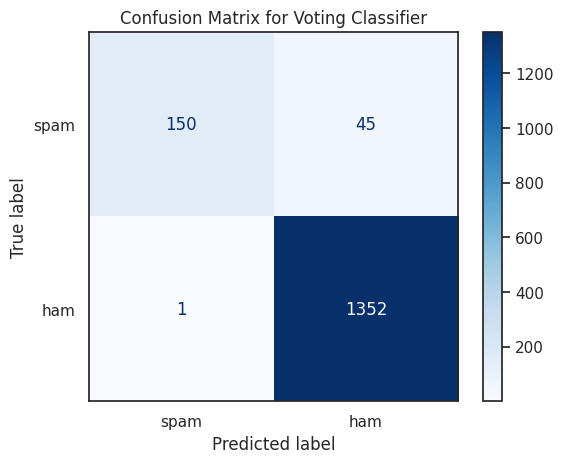

In [78]:
sns.set_style('white')
cm = confusion_matrix(test_y, voting_y_pred)

# Using ConfusionMatrixDisplay for better visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['spam', 'ham'])
disp.plot(cmap='Blues', values_format='d')  # Adjust the colormap and values format

plt.title('Confusion Matrix for Voting Classifier')
plt.show()


In [79]:
X = df['Text']
y = df['Category']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state = 8888)
max_len = max(max(train_X.apply(len).values),max(test_X.apply(len).values))

def fit_tokenizer(text, oov_token):
    tokenizer = Tokenizer(oov_token = oov_token)
    tokenizer.fit_on_texts(text)
    return tokenizer

# for sequence, padding
def seq_padding(sentences, tokenizer, padding, truncating, maxlen):
    sequences = tokenizer.texts_to_sequences(sentences)
    pad_trunc_sequences = pad_sequences(sequences, padding = padding, maxlen = maxlen, truncating=padding)
    return pad_trunc_sequences

tokenizer = fit_tokenizer(train_X, "<OOV>")

word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

train_X = seq_padding(train_X,tokenizer, 'post', 'post',max_len)
test_X = seq_padding(test_X,tokenizer, 'post', 'post', max_len)

def callback(MATRIX, PATIENCE):

    callbacks = [EarlyStopping(monitor=MATRIX,
                                patience=PATIENCE,
                                restore_best_weights=True),
                  ModelCheckpoint('model',
                                  monitor=MATRIX,
                                  save_best_only=True,
                                  save_weights_only=True)]
    return callbacks

def LSTM_model(vocab_size, embedding_dim, maxlen):

    model = Sequential()

    model.add(Embedding(vocab_size+1,embedding_dim,input_length = maxlen))
    model.add(Bidirectional(LSTM(64,kernel_regularizer=keras.regularizers.l2(0.001))))

    tf.keras.layers.GlobalAveragePooling1D()

    model.add(Dense(6, activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss = 'binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics = ['Accuracy'])

    return model

model = LSTM_model(VOCAB_SIZE, 100, max_len)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 910, 100)          740500    
                                                                 
 bidirectional (Bidirection  (None, 128)               84480     
 al)                                                             
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 825761 (3.15 MB)
Trainable params: 825761 (3.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
history = model.fit(train_X, train_y, epochs = 3, batch_size = 8, callbacks = callback('Accuracy', 2))

test_prediction_label = (model.predict(test_X) >= 0.5).astype("int32")
test_predict_proba = model.predict(test_X, verbose=0)

NN_accuracy = accuracy_score(test_y, test_prediction_label)
NN_AUC = roc_auc_score(test_y, test_prediction_label)
NN_recall = recall_score(test_y, test_prediction_label)
NN_f1 = f1_score(test_y, test_prediction_label)

print(NN_accuracy, NN_AUC, NN_recall, NN_f1)

Epoch 1/3
452/452 [==============================] - 39s 86ms/step - loss: 0.4123 - Accuracy: 0.8975
Epoch 2/3
452/452 [==============================] - 24s 53ms/step - loss: 0.1801 - Accuracy: 0.9781
Epoch 3/3
49/49 [==============================] - 2s 21ms/step
0.9599483204134367 0.851998408095969 0.9963045084996305 0.9775199419869471


In [82]:
cv_accuracy_means.append(NN_accuracy)
cv_auc_means.append(NN_AUC)
cv_recall_means.append(NN_recall),
cv_f1_means.append(NN_f1)


In [83]:
model_names.append('NN')

In [84]:
plot_model_score(model_names, cv_metrics_dict, 'Cross Validation 5 fold)')
